The aim is to find how complex state spaces are transformed to fit the Q learning format

# Implementation 1

[Source](https://www.geeksforgeeks.org/q-learning-in-python/amp/)

2021-03-08- 08-54

I have observed that the state format is just Discrete(n). 
- What was the initial observation space?
- How did they convert that into the Discrete(n) space?

In [11]:
import gym 

import itertools 

import matplotlib 

import matplotlib.style 

import numpy as np 

import pandas as pd 

import sys 

from collections import defaultdict 

from windy_gridworld import WindyGridworldEnv 

 

import windy_grid_world_ibrahim



In [2]:
env = WindyGridworldEnv() 

nS, nA, P, isd 70 4 {0: {0: [(1.0, 0, -1.0, False)], 1: [(1.0, 1, -1.0, False)], 2: [(1.0, 10, -1.0, False)], 3: [(1.0, 0, -1.0, False)]}, 1: {0: [(1.0, 1, -1.0, False)], 1: [(1.0, 2, -1.0, False)], 2: [(1.0, 11, -1.0, False)], 3: [(1.0, 0, -1.0, False)]}, 2: {0: [(1.0, 2, -1.0, False)], 1: [(1.0, 3, -1.0, False)], 2: [(1.0, 12, -1.0, False)], 3: [(1.0, 1, -1.0, False)]}, 3: {0: [(1.0, 3, -1.0, False)], 1: [(1.0, 4, -1.0, False)], 2: [(1.0, 3, -1.0, False)], 3: [(1.0, 2, -1.0, False)]}, 4: {0: [(1.0, 4, -1.0, False)], 1: [(1.0, 5, -1.0, False)], 2: [(1.0, 4, -1.0, False)], 3: [(1.0, 3, -1.0, False)]}, 5: {0: [(1.0, 5, -1.0, False)], 1: [(1.0, 6, -1.0, False)], 2: [(1.0, 5, -1.0, False)], 3: [(1.0, 4, -1.0, False)]}, 6: {0: [(1.0, 6, -1.0, False)], 1: [(1.0, 7, -1.0, False)], 2: [(1.0, 6, -1.0, False)], 3: [(1.0, 5, -1.0, False)]}, 7: {0: [(1.0, 7, -1.0, False)], 1: [(1.0, 8, -1.0, False)], 2: [(1.0, 7, -1.0, False)], 3: [(1.0, 6, -1.0, False)]}, 8: {0: [(1.0, 8, -1.0, False)], 1: [(1.0

In [4]:
def createEpsilonGreedyPolicy(Q, epsilon, num_actions): 

    """ 

    Creates an epsilon-greedy policy based 

    on a given Q-function and epsilon. 

       

    Returns a function that takes the state 
a
    as an input and returns the probabilities 

    for each action in the form of a numpy array  

    of length of the action space(set of possible actions). 

    """

    def policyFunction(state):
        

        Action_probabilities = np.ones(num_actions, 

                dtype = float) * epsilon / num_actions 

                  

        best_action = np.argmax(Q[state]) 

        Action_probabilities[best_action] += (1.0 - epsilon) 

        return Action_probabilities 

   

    return policyFunction 
 

def qLearning(env, num_episodes, discount_factor = 1.0, 

                            alpha = 0.6, epsilon = 0.1): 

    """ 

    Q-Learning algorithm: Off-policy TD control. 

    Finds the optimal greedy policy while improving 

    following an epsilon-greedy policy"""

       

    # Action value function 

    # A nested dictionary that maps 

    # state -> (action -> action-value). 

    Q = defaultdict(lambda: np.zeros(env.action_space.n)) 

   

    # Keeps track of useful statistics 

    stats = plotting.EpisodeStats( 

        episode_lengths = np.zeros(num_episodes), 

        episode_rewards = np.zeros(num_episodes))     

       

    # Create an epsilon greedy policy function 

    # appropriately for environment action space 

    policy = createEpsilonGreedyPolicy(Q, epsilon, env.action_space.n) 

       

    # For every episode 

    for ith_episode in range(num_episodes): 

           

        # Reset the environment and pick the first action 

        state = env.reset() 
        #print("This is my state format ",state)
           

        for t in itertools.count(): 

               

            # get probabilities of all actions from current state 

            action_probabilities = policy(state) 

   

            # choose action according to  

            # the probability distribution 

            action = np.random.choice(np.arange( 

                      len(action_probabilities)), 

                       p = action_probabilities) 

   

            # take action and get reward, transit to next state 

            next_state, reward, done, _ = env.step(action) 
            #print("This is the next state from step ",next_state)
               

            # Update statistics 

            stats.episode_rewards[ith_episode] += reward 

            stats.episode_lengths[ith_episode] = t 

               

            # TD Update 

            best_next_action = np.argmax(Q[next_state])     

            td_target = reward + discount_factor * Q[next_state][best_next_action] 

            td_delta = td_target - Q[state][action] 

            Q[state][action] += alpha * td_delta 

   

            # done is True if episode terminated    

            if done: 

                break

                   

            state = next_state 

       

    return Q, stats 

In [5]:
Q, stats = qLearning(env, 1000) 



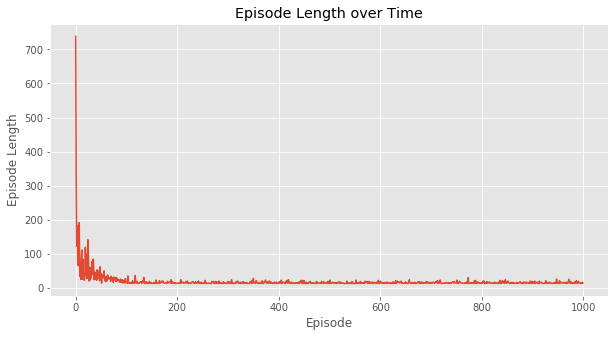

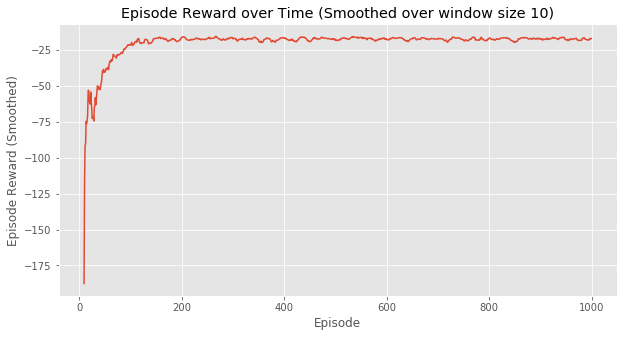

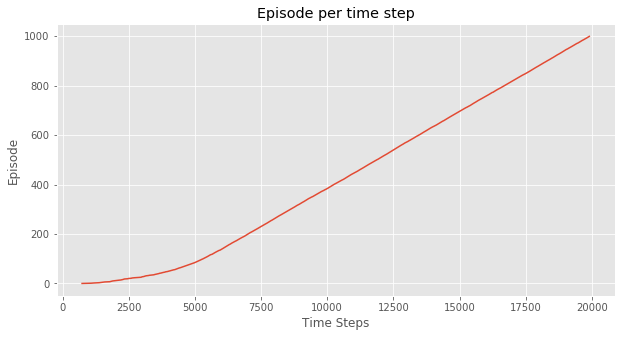

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [6]:
plotting.plot_episode_stats(stats)

